In [7]:
import pandas as pd

file_path = r"D:\VScode\bipolar_seesaw_CCM\ice_core_data\EDC_CH4_AICC2012_chron_Bazin et al-2013.tab"
df_ch4 = pd.read_csv(file_path, sep='\t', skiprows=20)
df_ch4.head()
# only keep the last 2 columns
df_ch4 = df_ch4.iloc[:, -2:]
# rename the columns
df_ch4.columns = ['age', 'ch4']

# age =age *1000
df_ch4['age'] = df_ch4['age'] * 1000
df_ch4


,age,ch4
0,194.417,907.0
1,349.004,784.0
2,349.382,762.0
3,351.595,710.0
4,370.178,727.0
...,...,...
2098,795454.000,428.0
2099,796799.000,418.0
2100,797541.000,396.0
2101,798593.000,458.0


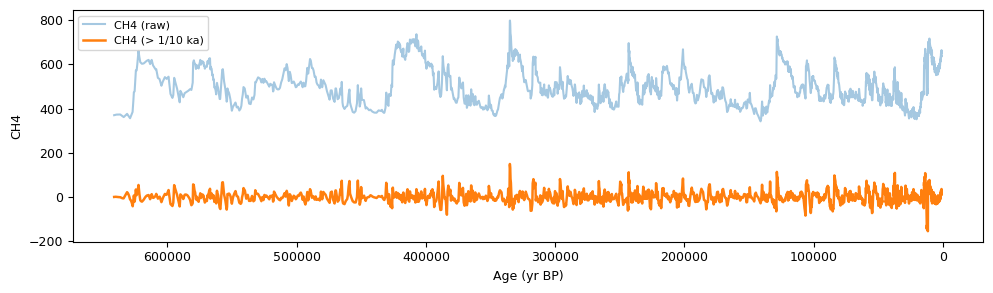

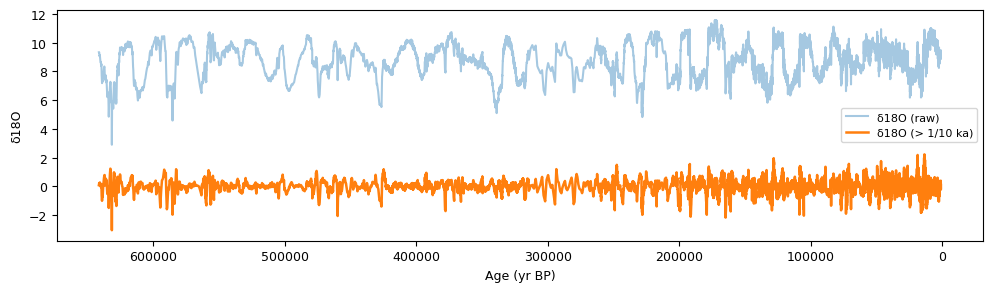

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)



file_path = r"D:\VScode\bipolar_seesaw_CCM\ice_core_data\EDC_CH4_AICC2012_chron_Bazin et al-2013.tab"
df_ch4 = pd.read_csv(file_path, sep='\t', skiprows=20)
df_ch4.head()
# only keep the last 2 columns
df_ch4 = df_ch4.iloc[:, -2:]
# rename the columns
df_ch4.columns = ['age', 'ch4']

# age =age *1000
df_ch4['age'] = df_ch4['age'] * 1000
df_ch4



file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)

dt=10
# 1) Build common 10-yr age grid over their overlap
age_min = 1000 # max(df_ch4['age'].min(), df_d18O['age'].min())
age_max = min(df_ch4['age'].max(), df_d18O['age'].max())
ages = np.arange(age_min, age_max + 1, dt)

# 2) Interpolate each onto that grid
ch4 = np.interp(ages, df_ch4['age'], df_ch4['ch4'])
d18O = np.interp(ages, df_d18O['age'], df_d18O['-d18O'])



df_ch4_interp = pd.DataFrame({'age':ages, 'ch4':ch4})
df_d18O_interp = pd.DataFrame({'age':ages, 'd18O':d18O})

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)




# df_filt_ch4, df_filt_d18O = sa.bandpass_ch4_d18o(
#     df_ch4_interp,
#     df_d18O_interp,
#     low_period = 100,     # keep variability slower than 300 yr
#     high_period = 10_000,  # and faster than 3 ka
#     flip_sign = False,
#     plot = True
# )



# Diff age analysis

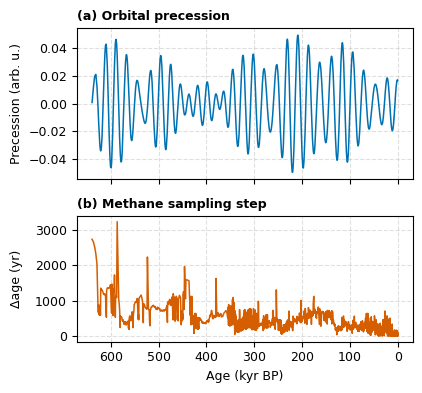

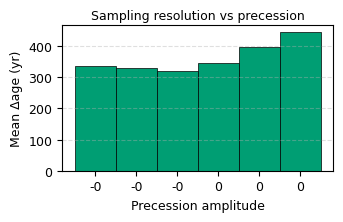

In [11]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig_pair, fig_bar = sa.age_gap_ana(
    df_ch4,
    age_min=200,
    age_max=640_000,
    pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
    n_bins=6,
    tolerance=200
)



# TE dT plot

     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000271  0.035  0.000176  0.260     True
1    20  0.000466  0.085  0.000320  0.370    False
2    30  0.000614  0.195  0.000371  0.680    False
3    40  0.000757  0.255  0.000549  0.530    False
4    50  0.001009  0.195  0.000872  0.375    False
5    60  0.001152  0.185  0.001033  0.270    False
6    70  0.001084  0.415  0.001127  0.345    False
7    80  0.001151  0.635  0.001242  0.255    False
8    90  0.001437  0.425  0.001814  0.145    False
9   100  0.001605  0.470  0.001887  0.210    False
10  110  0.001874  0.400  0.002013  0.170    False
11  120  0.002736  0.130  0.002675  0.100    False
12  130  0.002594  0.185  0.003161  0.055    False
13  140  0.001629  0.755  0.002082  0.385    False
14  150  0.002077  0.550  0.003567  0.070    False
15  200  0.002427  0.810  0.002402  0.595    False


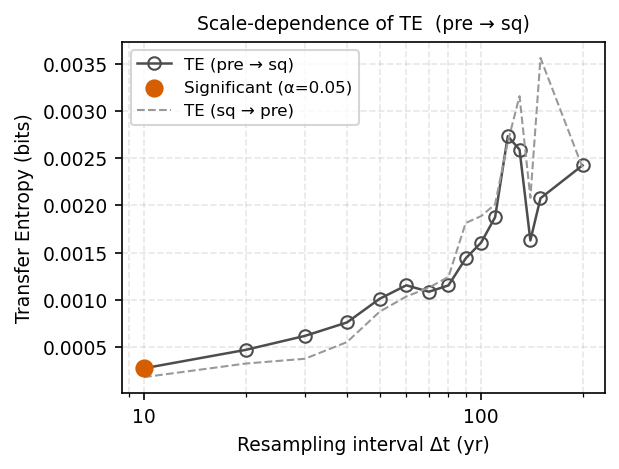

In [12]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_ch4,                 # your raw sq-series
    dt_steps,
    forcing_bins=6, sq_bins=2,
    n_surr=200, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000157  0.440  0.000138  0.545    False
1    20  0.000297  0.460  0.000248  0.635    False
2    30  0.000411  0.670  0.000622  0.160    False
3    40  0.000447  0.795  0.000616  0.390    False
4    50  0.000666  0.665  0.000809  0.415    False
5    60  0.000562  0.940  0.000751  0.610    False
6    70  0.000799  0.790  0.001159  0.345    False
7    80  0.001324  0.370  0.000946  0.590    False
8    90  0.000822  0.920  0.000988  0.685    False
9   100  0.001012  0.915  0.000752  0.925    False
10  110  0.001268  0.820  0.001535  0.430    False
11  120  0.001229  0.885  0.001170  0.720    False
12  130  0.001603  0.775  0.001436  0.620    False
13  140  0.001423  0.900  0.001007  0.915    False
14  150  0.002337  0.450  0.001470  0.705    False
15  200  0.003165  0.520  0.001408  0.915    False


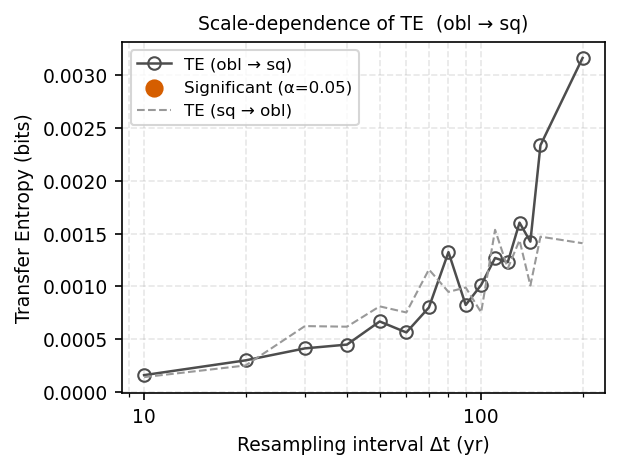

In [13]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_ch4,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=6, sq_bins=2,
    n_surr=200, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


# TE from pre and obl to CH4 MCV (dt=10)

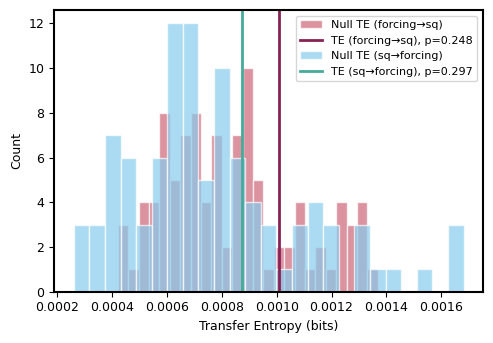

False


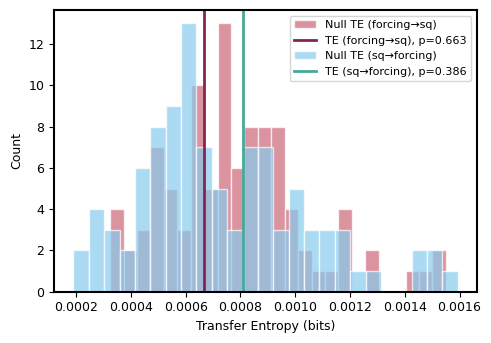

False


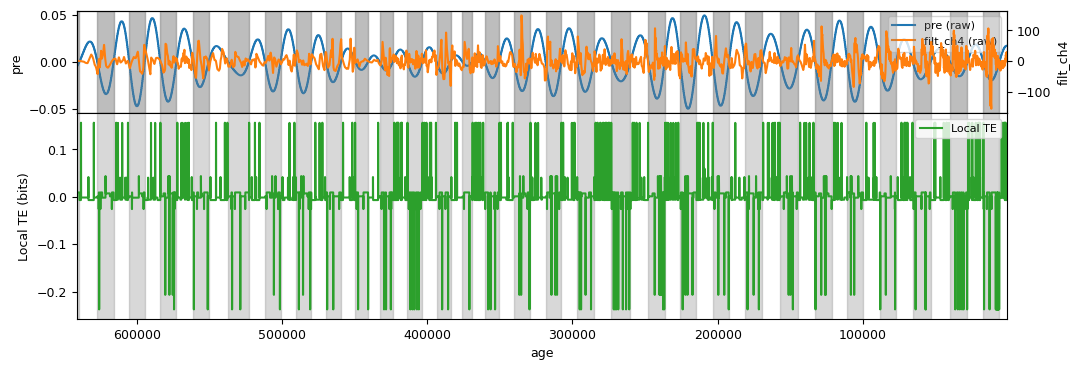

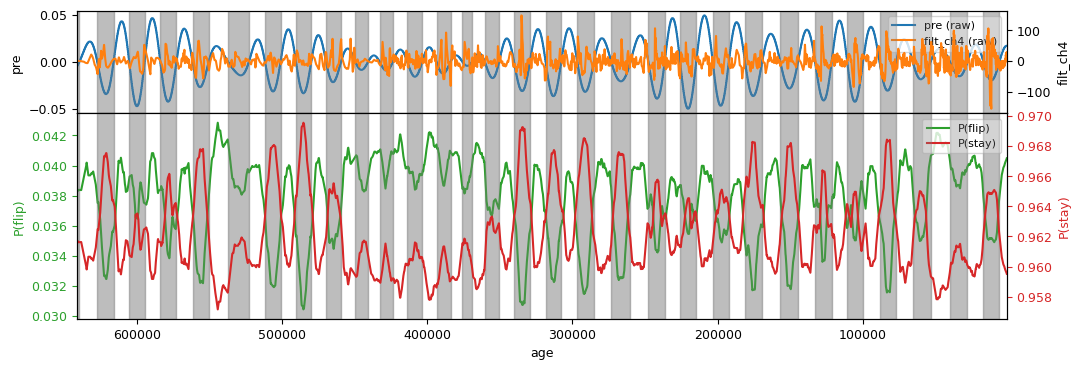

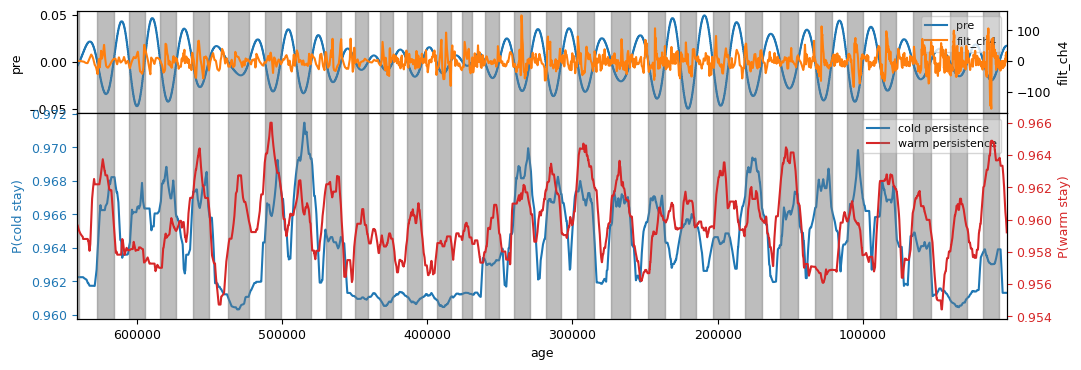

In [14]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 50, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)


LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)



Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)




# Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# TE change with time

# Where the TE comes from

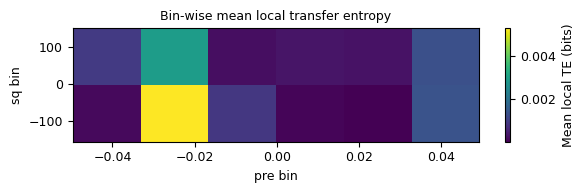

In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

max-power row = 55   →  period ≈ 23.1 ka


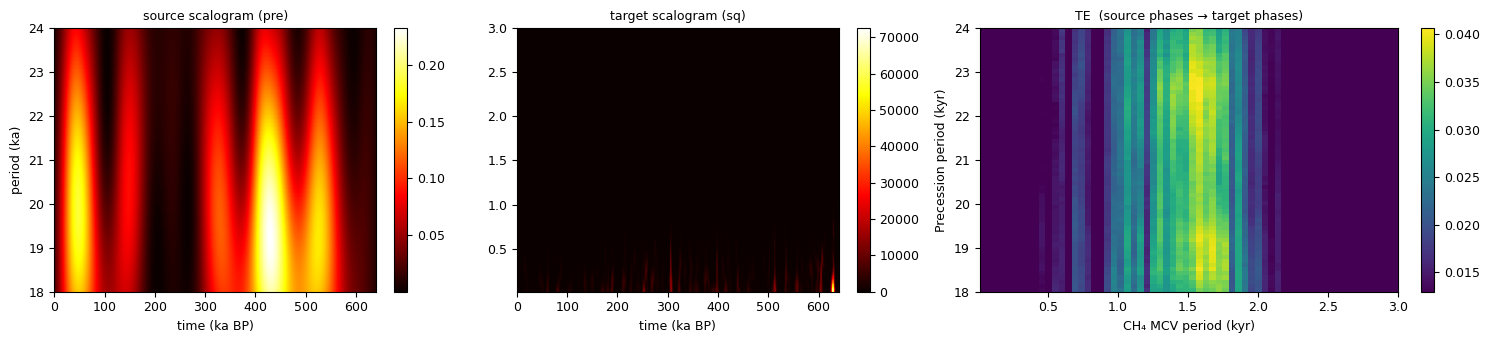

[[0.00539342 0.00064169 0.00040762 ... 0.00331996 0.00156648 0.00293853]
 [0.00550352 0.00075648 0.00052401 ... 0.00329085 0.00152266 0.00294006]
 [0.00567844 0.00072837 0.00049767 ... 0.00331066 0.0014027  0.0029814 ]
 ...
 [0.00658463 0.00112927 0.00088478 ... 0.00315259 0.00122226 0.0030795 ]
 [0.00653811 0.00114375 0.00089721 ... 0.00314235 0.00128774 0.00307358]
 [0.00663462 0.00108246 0.00083206 ... 0.00326472 0.00122925 0.00307668]]


In [15]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = 50,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 18_000,
    src_max_period = 24_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 10,
    trg_max_period = 3_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='CH₄ MCV'        # e.g. 'sq'
)
print(te_mat)

In [47]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# te_mat, p_src, p_trg = sa.freq_resolved_te(
#     x = obl,             # forcing   (chronological order!)
#     y = sq,              # response
#     sampling_period = 100,     # yr/pt
#     # source band: narrow around 20 ka
#     src_min_period = 35_000,
#     src_max_period = 50_000,
#     n_src_scales   = 64,
#     # target band: 0.1–3 ka
#     trg_min_period = 10,
#     trg_max_period = 3_000,
#     n_trg_scales   = 64,
#     k = 1,
#     plot = True,
#     source_vname='Obliquity',       # e.g. 'pre'
#     target_vname='CH₄ MCV'        # e.g. 'sq'
# )

# P stay P flip analysis

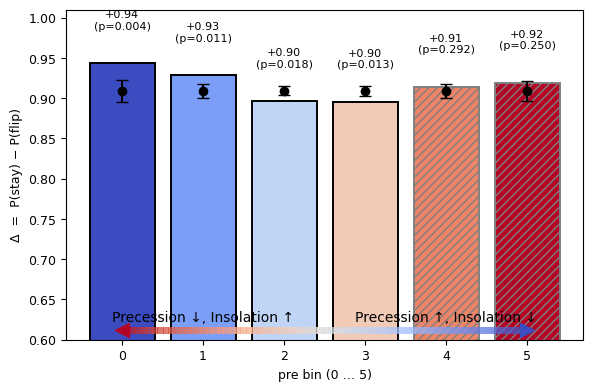

In [100]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_ch4',
        nbins_pre=6,
        n_surr=1000,
        alpha=0.05,
        random_state=0   # reproducible
)
# print(delta, mu, sigma, p)

# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_ch4',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

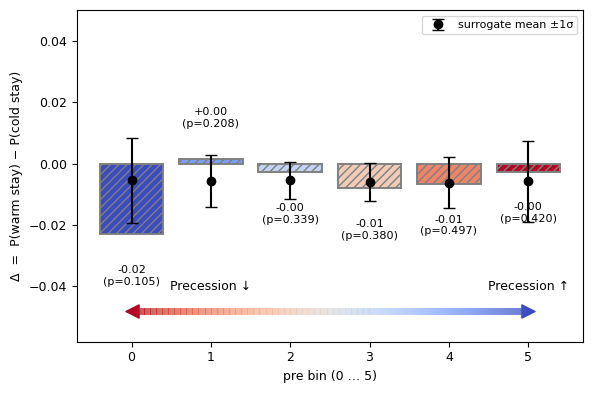

In [101]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_ch4',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
# delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
#     df_pre      = df_obl_i,
#     df_sq       = df_sq_i,
#     forcing_column='obl',
#     target_column='filt_ch4',
#     nbins_pre   = 6,
#     n_surr      = 1000,
#     alpha       = 0.05,
#     random_state=0
# )

# The following are sensitivity tests

# Bin count

(12806,) (12806,) (12806,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    519   1068   1799   1761   1150    509
sq=1    331   1052   1553   1669    966    429


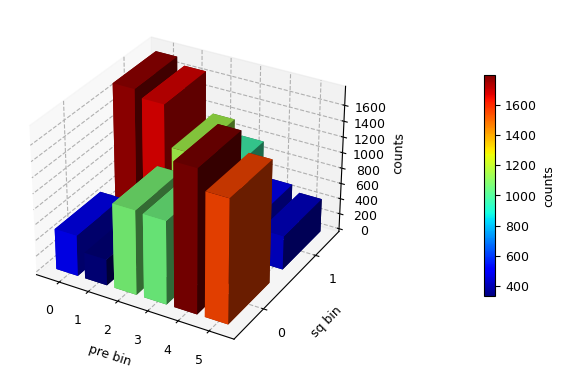

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    666   1400   1085   1019   1576   1060
sq=1    494   1326   1009    991   1218    962


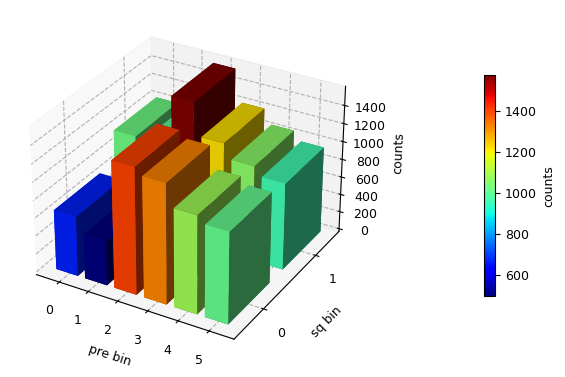

In [102]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

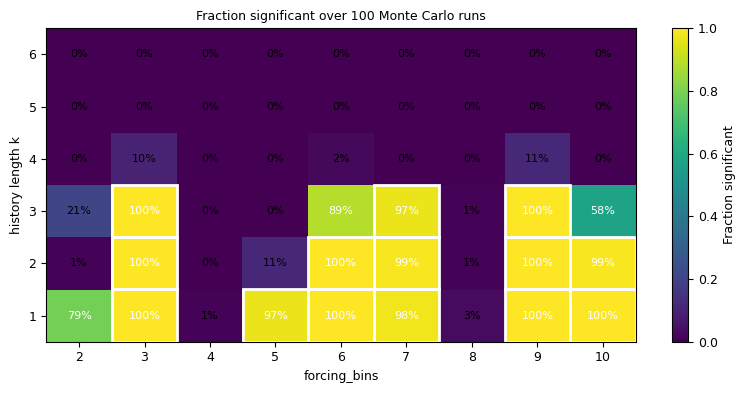

In [103]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 50, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_ch4'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

In [66]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 10, if_plot=False)

# fractions= sa.mc_TE_heatmap(
#     pre =df_obl_i['obl'].values,
#     sq =df_sq_i['filt_ch4'].values,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     ks=None,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     plot=True)

# Influence of noise, test on different dt

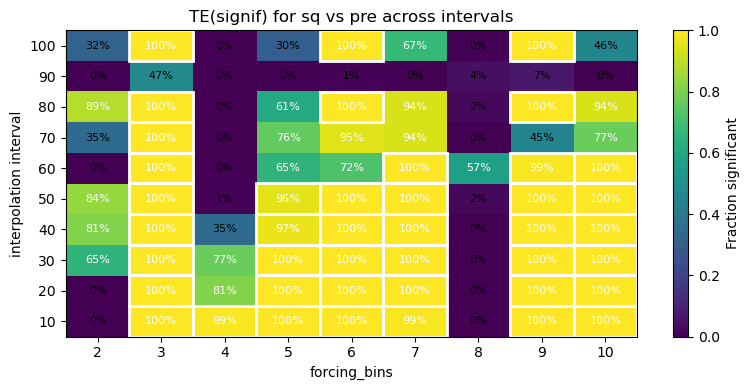

In [ ]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_ch4.copy(),
    target_column='filt_ch4',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

In [65]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )

# f=sa.mc_TE_heatmap_inter(
#     df_filt_ch4,
#     target_column='filt_ch4',
#     intervals=None,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     k=1,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     forcing_var='obl',
#     plot=True
# )

# Influence of age scale uncertainty: random scaling experiment

In [93]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 5800 # the maximum age uncertainty of AICC2023 gas age (Bouchet et al., 2023)
max_age_ratio = max_age_error / np.max(df_filt_ch4['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_ch4.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 30, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_ch4'].values
    
    # test pre → sq
    result_pre, _ = sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ = sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 86 runs
  obl → sq was significant in 64 runs


# Influence of noise: random thining

In [92]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]
[(0.2, False), (0.4, False), (0.6000000000000001, False), (0.8, False), (1.0, False)]


# The influence of different bining plan ([max-min]/2; median; k-means)

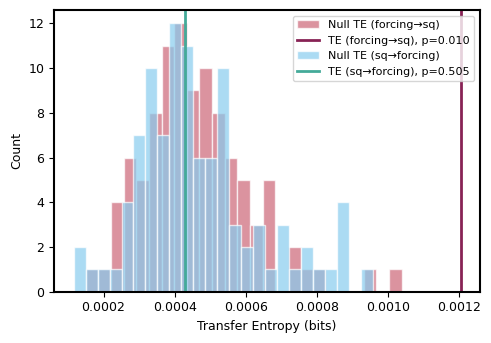

True


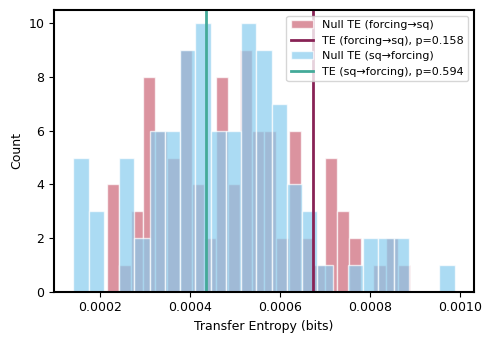

False


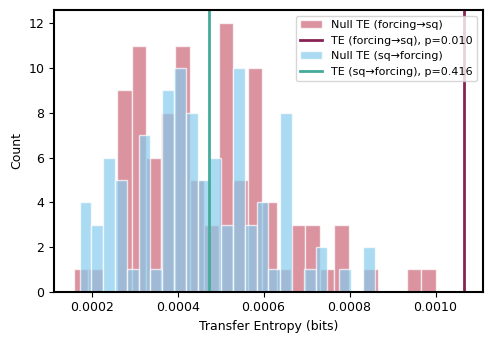

True


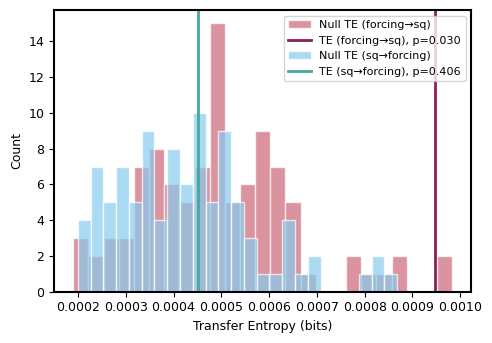

True


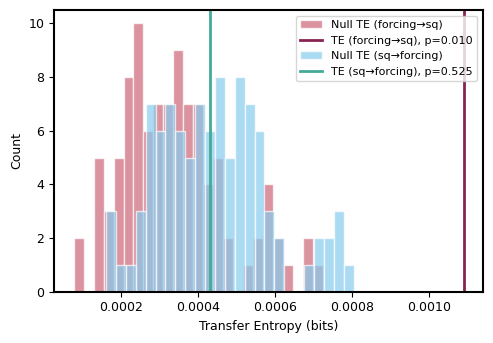

True


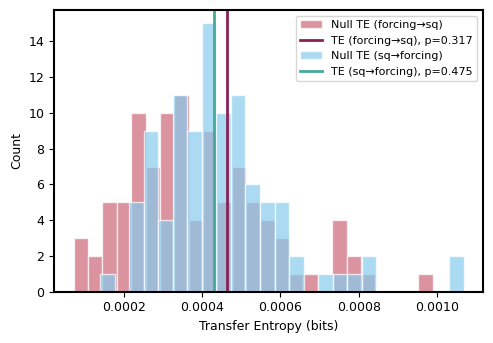

False


In [94]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

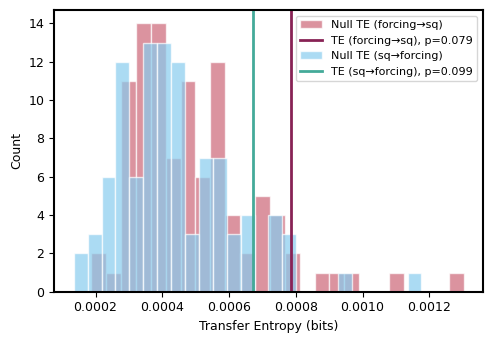

False


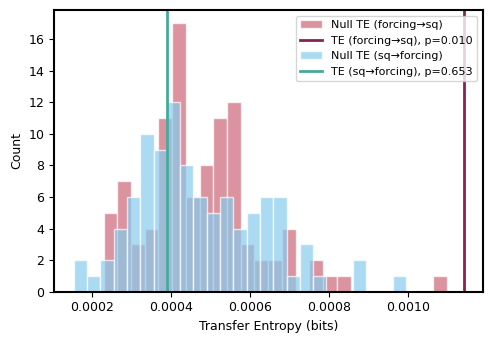

True


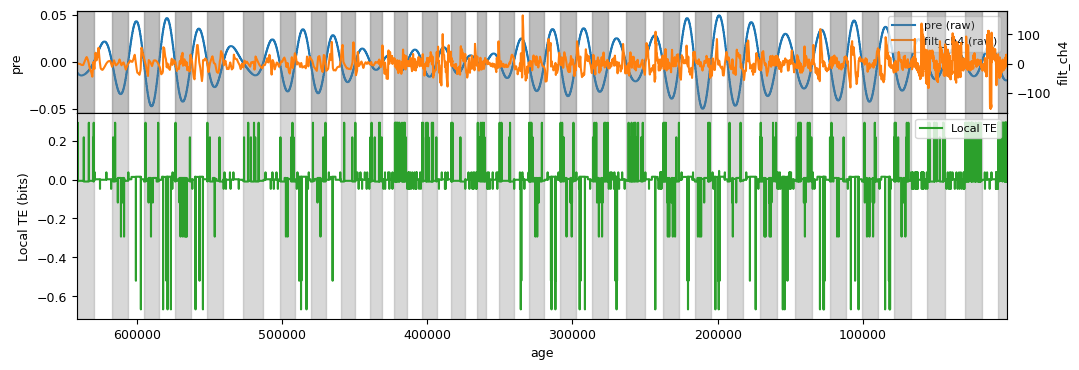

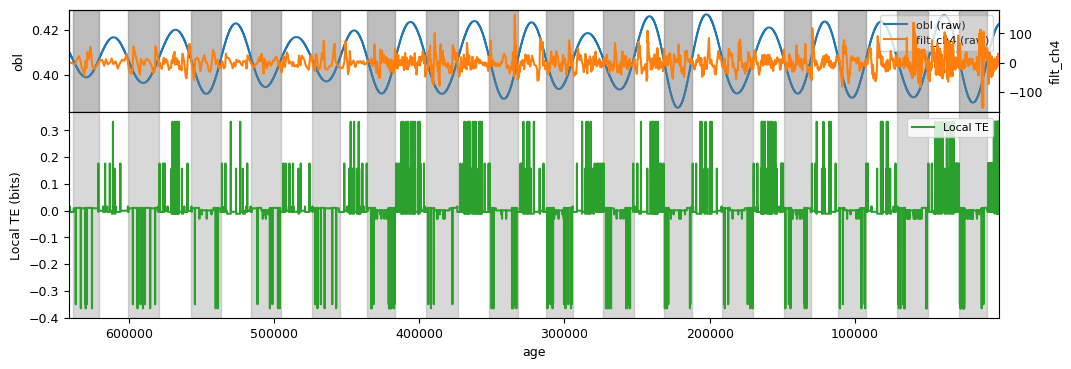

In [95]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

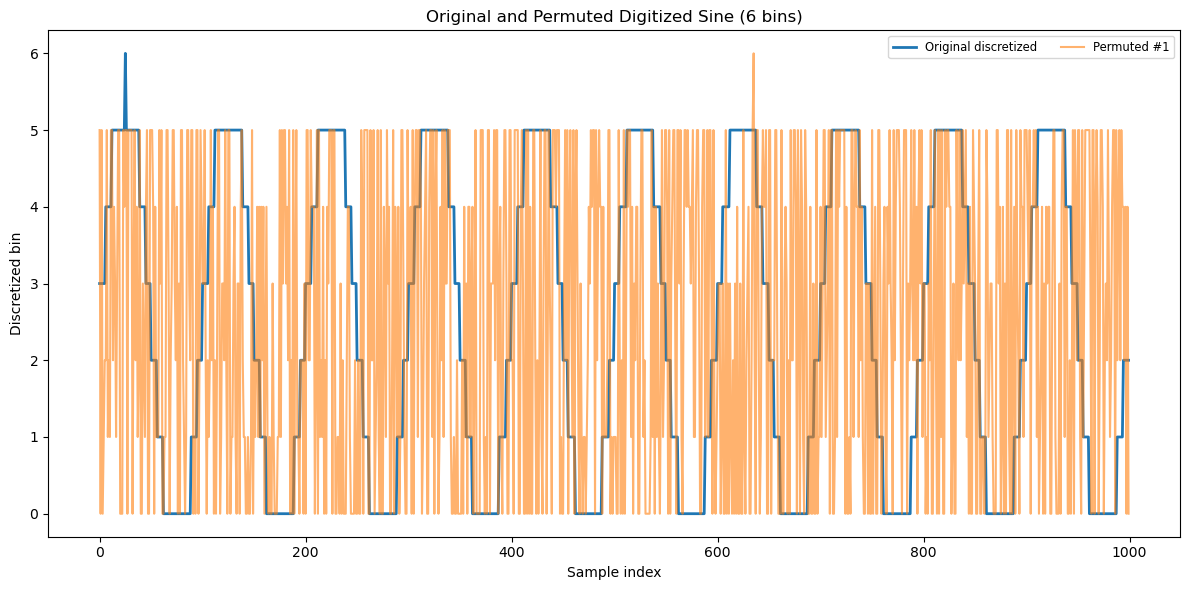

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The CH4 bins

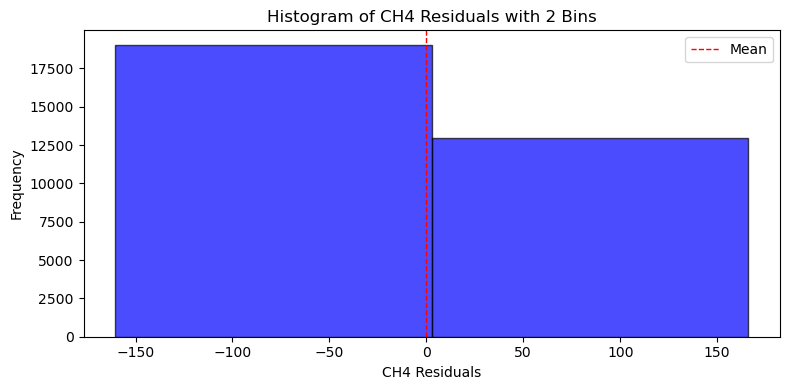

In [ ]:
# plot the histogram of sq with bins=2
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of CH4 Residuals with 2 Bins')
plt.xlabel('CH4 Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()